In [229]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [230]:
import numpy as np

In [231]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#midterms since:2022-09-06 until:2022-11-07').get_items()):
    if i>4000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.sourceLabel, tweet.content, 
                                tweet.id, tweet.mentionedUsers])
    
# Creating a dataframe to load the list
df = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Source of Tweet", "Tweet", 
                                                "ID", "mentionedusers"])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_54016/960288494.py:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.sourceLabel, tweet.content,


In [232]:
df

,User,Date Created,Source of Tweet,Tweet,ID,mentionedusers
0,JohannesNormann,2022-11-06 23:59:13+00:00,Twitter Web App,👍👍👍#Midterms,1589407083279310848,None
1,taylmae,2022-11-06 23:58:24+00:00,Twitter for iPhone,Reminder that the judges on the Cook County ba...,1589406880727584768,None
2,PoliticsKulture,2022-11-06 23:57:11+00:00,ContentStudio.io,Youngkin Excuses Kari Lake's Election Lies: No...,1589406573876609025,None
3,PoliticsKulture,2022-11-06 23:57:10+00:00,ContentStudio.io,Actors Mandy Patinkin And Kathryn Grody: Get O...,1589406570663788547,None
4,ReneNow,2022-11-06 23:53:21+00:00,Twitter for iPhone,#CNN #Midterms #oregon,1589405609111453697,None
...,...,...,...,...,...,...
3996,PoliticsKulture,2022-11-04 07:39:12+00:00,ContentStudio.io,Economy Driving Voters To The Polls https://t....,1588435681189281793,None
3997,ErodingNewZeala,2022-11-04 07:37:29+00:00,Twitter Web App,#ElonMuskTakesTwitter #VoteBlue I swear to God...,1588435247108358152,None
3998,CorentinSellin,2022-11-04 07:36:06+00:00,Twitter Web App,"3. Et selon les travaux d'@OpenSecretsDC, les ...",1588434899543130112,[https://twitter.com/OpenSecretsDC]
3999,PoliticsKulture,2022-11-04 07:34:11+00:00,ContentStudio.io,Report: States Bracing For Conspiracy Fueled T...,1588434417445380096,None


In [233]:
df = df[['User', 'Date Created', 'mentionedusers']]

In [234]:
df['user_2'] = df['mentionedusers'][df['mentionedusers'].notnull()].apply(lambda x: x[0].username)

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_54016/3464019908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_2'] = df['mentionedusers'][df['mentionedusers'].notnull()].apply(lambda x: x[0].username)


In [235]:
df['user_2'] = df['user_2'].fillna(df['User'])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_54016/3119660080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_2'] = df['user_2'].fillna(df['User'])


In [236]:
df = df.drop(columns = ['mentionedusers'])

In [237]:
df['type'] = df.apply(lambda x: 'Retweet' if x.User != x.user_2 else 'Tweet', axis = 1)

In [238]:
df['type']

0         Tweet
1         Tweet
2         Tweet
3         Tweet
4         Tweet
         ...   
3996      Tweet
3997      Tweet
3998    Retweet
3999      Tweet
4000      Tweet
Name: type, Length: 4001, dtype: object

In [239]:
df.type.value_counts()

Tweet      2779
Retweet    1222
Name: type, dtype: int64

In [240]:
df

,User,Date Created,user_2,type
0,JohannesNormann,2022-11-06 23:59:13+00:00,JohannesNormann,Tweet
1,taylmae,2022-11-06 23:58:24+00:00,taylmae,Tweet
2,PoliticsKulture,2022-11-06 23:57:11+00:00,PoliticsKulture,Tweet
3,PoliticsKulture,2022-11-06 23:57:10+00:00,PoliticsKulture,Tweet
4,ReneNow,2022-11-06 23:53:21+00:00,ReneNow,Tweet
...,...,...,...,...
3996,PoliticsKulture,2022-11-04 07:39:12+00:00,PoliticsKulture,Tweet
3997,ErodingNewZeala,2022-11-04 07:37:29+00:00,ErodingNewZeala,Tweet
3998,CorentinSellin,2022-11-04 07:36:06+00:00,OpenSecretsDC,Retweet
3999,PoliticsKulture,2022-11-04 07:34:11+00:00,PoliticsKulture,Tweet


In [241]:
df = df.loc[:, ['User', 'user_2', 'Date Created', 'type']]

In [242]:
df = df.rename(columns = {'User': 'user1', 'user_2': 'user2', 'Date Created': 'date'})

In [243]:
network_df = df

In [244]:
network_df

,user1,user2,date,type
0,JohannesNormann,JohannesNormann,2022-11-06 23:59:13+00:00,Tweet
1,taylmae,taylmae,2022-11-06 23:58:24+00:00,Tweet
2,PoliticsKulture,PoliticsKulture,2022-11-06 23:57:11+00:00,Tweet
3,PoliticsKulture,PoliticsKulture,2022-11-06 23:57:10+00:00,Tweet
4,ReneNow,ReneNow,2022-11-06 23:53:21+00:00,Tweet
...,...,...,...,...
3996,PoliticsKulture,PoliticsKulture,2022-11-04 07:39:12+00:00,Tweet
3997,ErodingNewZeala,ErodingNewZeala,2022-11-04 07:37:29+00:00,Tweet
3998,CorentinSellin,OpenSecretsDC,2022-11-04 07:36:06+00:00,Retweet
3999,PoliticsKulture,PoliticsKulture,2022-11-04 07:34:11+00:00,Tweet


# Social Media Analysis

In [245]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [246]:
def gen_graph(network_df):
    rt_in = network_df.type=='Retweet'
    rts = network_df[rt_in]
    tweets = network_df.drop(index= rts.index)
    graph = nx.DiGraph()
    graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
    graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')
    return graph

In [247]:
graph = gen_graph(network_df)

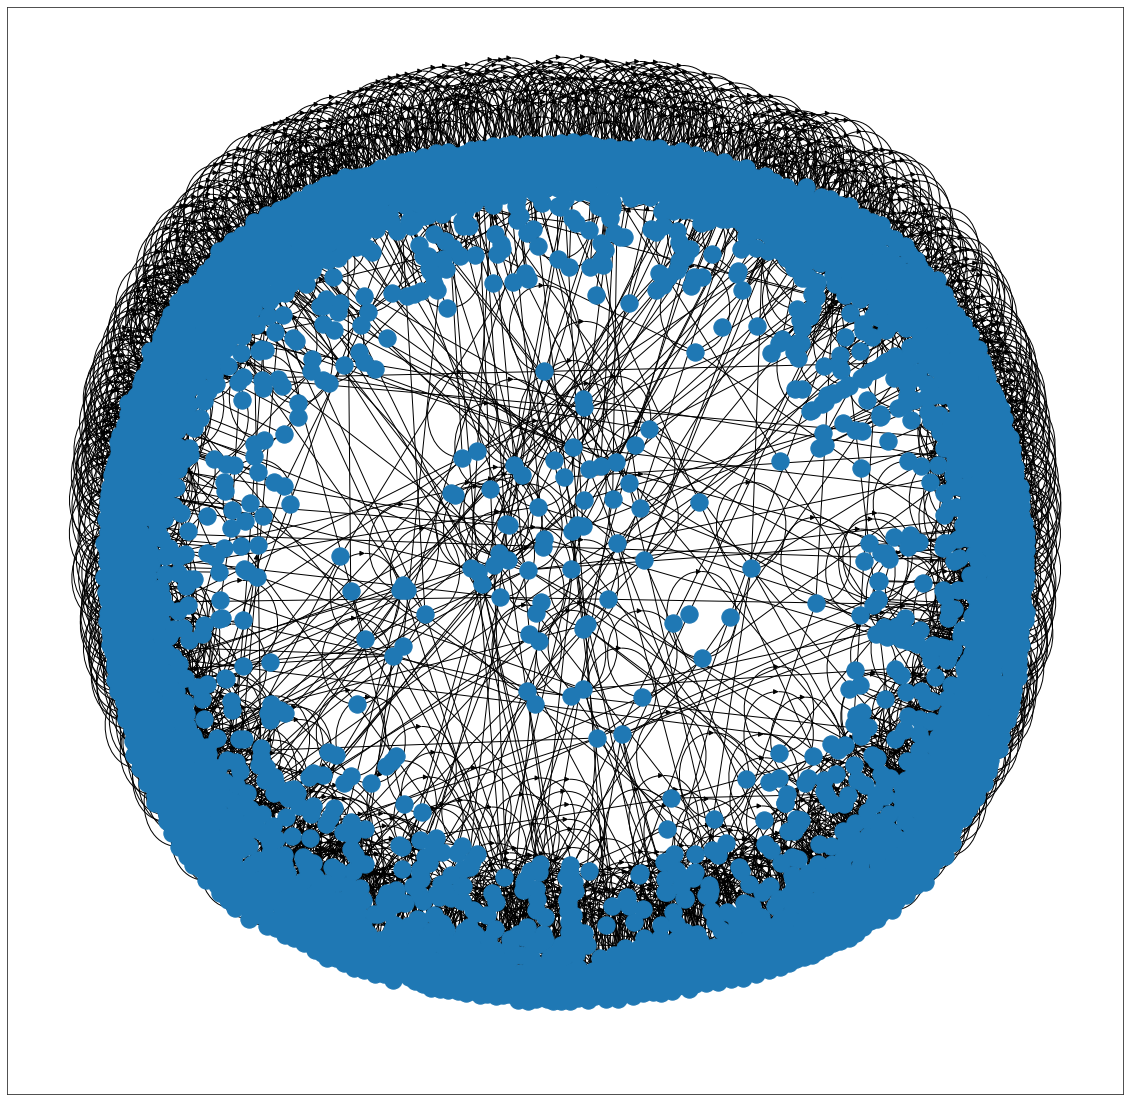

In [248]:
sns.set_style("white")
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
nx.draw_networkx(graph, font_size = 10, with_labels=False)
plt.show()

In [249]:
def network_feat(graph):
    df = {
        'in-degree_centrality': pd.Series(nx.algorithms.centrality.in_degree_centrality(graph)),
        'out-degree_centrality': pd.Series(nx.algorithms.centrality.out_degree_centrality(graph)),
        'betweeness_centrality': pd.Series(nx.algorithms.centrality.betweenness.betweenness_centrality(graph)),
        'eigenvector_centrality': pd.Series(nx.algorithms.centrality.eigenvector_centrality(graph)),
        'closeness': pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph.reverse())),
        'pagerank': pd.Series(nx.pagerank(graph, alpha=0.8))
    }
    
    return pd.concat(df, axis=1)

In [250]:
overall_feats = network_feat(graph)

In [251]:
overall_feats

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness,pagerank
GasqueRobert,0.000000,0.000334,0.0,2.884834e-18,0.000334,0.000105
DNC,0.001670,0.000000,0.0,5.221549e-16,0.000000,0.000484
WorldNewsRepor4,0.000000,0.000334,0.0,2.884834e-18,0.000334,0.000105
YouTube,0.010354,0.000000,0.0,1.387710e-06,0.000000,0.002467
pgjojo,0.000000,0.000334,0.0,2.884834e-18,0.000334,0.000105
...,...,...,...,...,...,...
andreasharsono,0.000334,0.000334,0.0,1.982443e-07,0.000000,0.000521
berangerecagnat,0.000334,0.000334,0.0,1.982443e-07,0.000000,0.000521
negocios_tv,0.000334,0.000334,0.0,1.982443e-07,0.000000,0.000521
lopinion_fr,0.000334,0.000334,0.0,1.982443e-07,0.000000,0.000521


<AxesSubplot:xlabel='pagerank', ylabel='Density'>

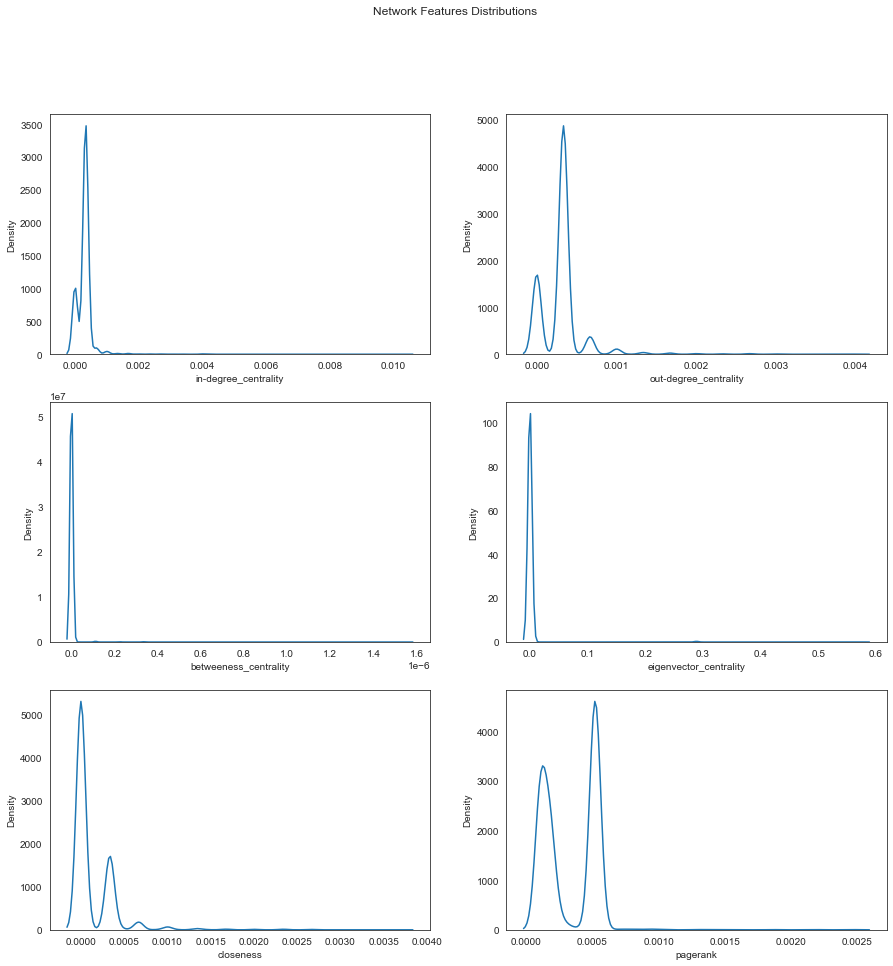

In [252]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
 
fig.suptitle('Network Features Distributions')

sns.kdeplot(ax=axes[0, 0], data=overall_feats, x='in-degree_centrality')
sns.kdeplot(ax=axes[0, 1], data=overall_feats, x='out-degree_centrality')
sns.kdeplot(ax=axes[1, 0], data=overall_feats, x='betweeness_centrality')
sns.kdeplot(ax=axes[1, 1], data=overall_feats, x='eigenvector_centrality')
sns.kdeplot(ax=axes[2, 0], data=overall_feats, x='closeness')
sns.kdeplot(ax=axes[2, 1], data=overall_feats, x='pagerank')

In [307]:
network_df['user2'].value_counts().head(50)

PoliticsKulture    262
darkmoneybot        85
ReneNow             37
POTUS               33
YouTube             33
TheMAGAWatch        29
AsmartagainUs       28
JoeBiden            28
TheDemocrats        26
elonmusk            24
MorningConsult      18
bobmcgee00123       18
GOP                 16
nytimes             14
JohnFetterman       13
VozMediaUSA         13
WARojas             12
welt                12
lilsal424           12
MSNBC               12
BayWest31           11
Soylensky           11
FoxNews             10
CorentinSellin      10
PaulZauch           10
imagingpdx          10
BuzzerlyApp         10
AOC                 10
washingtonpost       9
DrOz                 9
wmwms224             9
CNN                  9
10WallStreet         8
MehrSingh6           8
carlspaceness        8
wtxnewsusa           7
ResearchFuture2      7
WTXNewsArabic        7
wisconsin_now        7
JoshPNamm            7
tagesschau           7
nypost               7
JohnStauber          7
BarackObama

# Betweeness centrality

In [308]:
overall_feats.nlargest(10, 'betweeness_centrality')['betweeness_centrality']

CorentinSellin    1.562318e-06
MakeRoadActPA     5.579708e-07
wisconsin_now     4.463767e-07
FEscrutinio       3.347825e-07
lemondefr         3.347825e-07
Doppelgeist60     3.347825e-07
AzebWG            2.231883e-07
RFI               2.231883e-07
Left_in_Limbo     2.231883e-07
ConversationUS    1.115942e-07
Name: betweeness_centrality, dtype: float64

# Out-degree centrality

In [309]:
overall_feats.nlargest(10, 'out-degree_centrality')['out-degree_centrality']

SondraThorsland    0.004008
ErodingNewZeala    0.003006
CorentinSellin     0.003006
ReneNow            0.002672
Sikh59534976       0.002672
NEVERBOW           0.002672
MarchalOmbre_      0.002672
DrwillpF           0.002672
JohnStauber        0.002338
mehoffjack01       0.002338
Name: out-degree_centrality, dtype: float64

# Eigenvector centrality

In [310]:
overall_feats.nlargest(10, 'eigenvector_centrality')['eigenvector_centrality']

CorentinSellin    0.577331
washingtonpost    0.288666
NBCNews           0.288665
axios             0.288665
clhebdo5          0.288665
Lesjoursfr        0.288665
AliBaddou         0.288665
franceinfo        0.288665
OpenSecretsDC     0.288665
Doppelgeist60     0.005203
Name: eigenvector_centrality, dtype: float64

# Closeness

In [311]:
overall_feats.nlargest(10, 'closeness') ['closeness']

SondraThorsland    0.003674
Sikh59534976       0.002672
ErodingNewZeala    0.002672
CorentinSellin     0.002672
ReneNow            0.002338
mehoffjack01       0.002338
NEVERBOW           0.002338
MarchalOmbre_      0.002338
DrwillpF           0.002338
JohnStauber        0.002004
Name: closeness, dtype: float64

# Pagerank

In [312]:
overall_feats.nlargest(10, 'pagerank') ['pagerank']

YouTube            0.002467
tagesschau         0.002186
POTUS              0.001863
JoeBiden           0.001627
elonmusk           0.001484
Tagesspiegel       0.001354
geertwilderspvv    0.001283
GOP                0.001032
TheDemocrats       0.000968
WhatWasThatNews    0.000937
Name: pagerank, dtype: float64

# In-degree centrality

In [313]:
overall_feats.nlargest(10, 'in-degree_centrality') ['in-degree_centrality']

YouTube          0.010354
POTUS            0.009686
JoeBiden         0.007682
elonmusk         0.007348
TheDemocrats     0.005010
GOP              0.004676
nytimes          0.004008
JohnFetterman    0.004008
MSNBC            0.004008
FoxNews          0.003340
Name: in-degree_centrality, dtype: float64

# Closeness centrality

In [314]:
pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph)).nlargest(10)

YouTube          0.010354
POTUS            0.009697
JoeBiden         0.007695
elonmusk         0.007348
TheDemocrats     0.005010
GOP              0.004676
JohnFetterman    0.004032
nytimes          0.004008
MSNBC            0.004008
FoxNews          0.003340
dtype: float64